In [1]:
# import Librarys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder 
# from sklearn.metrics import r2_score 
# from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
# Data Importing
df = pd.read_csv('data/household_power_consumption.txt',sep=';')
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.describe()

,Sub_metering_3
count,185702.000000
mean,6.553521
std,8.469009
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


In [4]:
df['Date'].describe()

count        185711
unique          131
top       18/2/2007
freq           1440
Name: Date, dtype: object

In [5]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           9
dtype: int64

<AxesSubplot:>

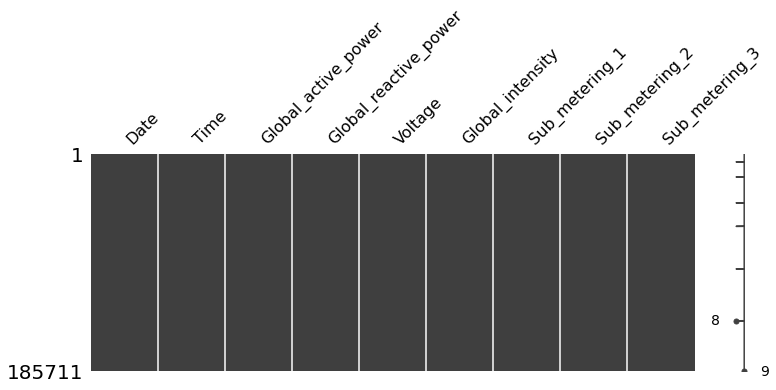

In [6]:
msno.matrix(df, figsize=(12, 4))

In [7]:
# Replace all ? with NAN. 
# This is useful in cases when you know the origin of the data and can be certain which values should be missing.
df.replace('?', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True)
df.replace('  ', np.nan, inplace=True)
df.replace('   ', np.nan, inplace=True)

In [8]:
df['Date'].value_counts()

18/2/2007     1440
22/4/2007     1440
19/3/2007     1440
18/3/2007     1440
17/3/2007     1440
              ... 
21/4/2007     1440
20/1/2007     1439
24/4/2007      995
16/12/2006     396
8                1
Name: Date, Length: 131, dtype: int64

In [9]:
df.iloc[49850:49860,:].head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
49850,20/1/2007,08:14:00,1.122,0.106,237.880,4.800,0.000,0.000,0.0
49851,20/1/2007,08:15:00,1.122,0.108,238.400,4.600,0.000,0.000,0.0
49852,20/1/2007,08:16:00,1.118,0.108,238.230,4.600,0.000,0.000,0.0
49853,20/1/2007,08:17:00,1.606,0.102,237.830,7.600,0.000,0.000,0.0
49854,20/1/2007,08:18:00,3.124,0.084,236.420,13.200,0.000,0.000,0.0
49855,8,08:19:00,2.984,0.086,236.340,12.600,0.000,0.000,0.0
49856,20/1/2007,08:20:00,1.622,0.102,238.160,7.800,0.000,0.000,0.0
49857,20/1/2007,08:21:00,0.840,0.114,239.480,3.600,0.000,0.000,0.0
49858,20/1/2007,08:22:00,0.828,0.112,239.070,3.400,0.000,0.000,0.0
49859,20/1/2007,08:23:00,0.834,0.118,240.460,3.400,0.000,0.000,0.0


In [10]:
df.replace({'8': '20/1/2007'}, inplace=True)

In [11]:
# Check Duplicates
df["is_duplicate"]= df.duplicated()
df.shape

(185711, 10)

In [12]:
# Remove Duplicates 
df = df.drop_duplicates(subset=None,keep="first") # Dropping duplicate rows
df = df.drop(['is_duplicate'],axis=1)  # Dropping created 'is_duplicate' column 
df.shape

(185711, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185711 entries, 0 to 185710
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   185711 non-null  object 
 1   Time                   185711 non-null  object 
 2   Global_active_power    185701 non-null  object 
 3   Global_reactive_power  185702 non-null  object 
 4   Voltage                185701 non-null  object 
 5   Global_intensity       185700 non-null  object 
 6   Sub_metering_1         185702 non-null  object 
 7   Sub_metering_2         185702 non-null  object 
 8   Sub_metering_3         185702 non-null  float64
dtypes: float64(1), object(8)
memory usage: 14.2+ MB


In [14]:
# make dataset numeric
df['Global_active_power'] = [float(x) for x in df['Global_active_power']]
df['Global_reactive_power'] = [float(x) for x in df['Global_reactive_power']]
df['Voltage'] = [float(x) for x in df['Voltage']]
df['Global_intensity'] = [float(x) for x in df['Global_intensity']]
df['Sub_metering_1'] = [float(x) for x in df['Sub_metering_1']]
df['Sub_metering_2'] = [float(x) for x in df['Sub_metering_2']]
df['Sub_metering_3'] = [float(x) for x in df['Sub_metering_3']]

In [15]:
# Replace the missing values with the mean
df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(),inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(),inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(),inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(),inplace=True)

In [16]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [17]:
# merge Date and Time into a datetime object
util_series = df['Date'] + ' ' + df['Time']
df['DateTime'] = util_series.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S'))
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
185706,24/4/2007,16:30:00,0.320,0.082,235.19,1.6,0.0,2.0,0.0,2007-04-24 16:30:00
185707,24/4/2007,16:31:00,0.328,0.078,234.53,1.6,0.0,1.0,0.0,2007-04-24 16:31:00
185708,24/4/2007,16:32:00,0.344,0.088,234.90,1.8,0.0,1.0,0.0,2007-04-24 16:32:00
185709,24/4/2007,16:33:00,0.416,0.174,235.29,2.0,0.0,1.0,0.0,2007-04-24 16:33:00


In [18]:
dt = df.copy()

In [19]:
#drop old Date and Time columns
df.drop(columns = ['Date','Time'],inplace = True)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
185706,0.320,0.082,235.19,1.6,0.0,2.0,0.0,2007-04-24 16:30:00
185707,0.328,0.078,234.53,1.6,0.0,1.0,0.0,2007-04-24 16:31:00
185708,0.344,0.088,234.90,1.8,0.0,1.0,0.0,2007-04-24 16:32:00
185709,0.416,0.174,235.29,2.0,0.0,1.0,0.0,2007-04-24 16:33:00


In [20]:
# Rearranging columns
cols = list(df.columns)
cols = cols[-1:] + cols[:-1]
data = df[cols]
data

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
185706,2007-04-24 16:30:00,0.320,0.082,235.19,1.6,0.0,2.0,0.0
185707,2007-04-24 16:31:00,0.328,0.078,234.53,1.6,0.0,1.0,0.0
185708,2007-04-24 16:32:00,0.344,0.088,234.90,1.8,0.0,1.0,0.0
185709,2007-04-24 16:33:00,0.416,0.174,235.29,2.0,0.0,1.0,0.0


## Data Analysis

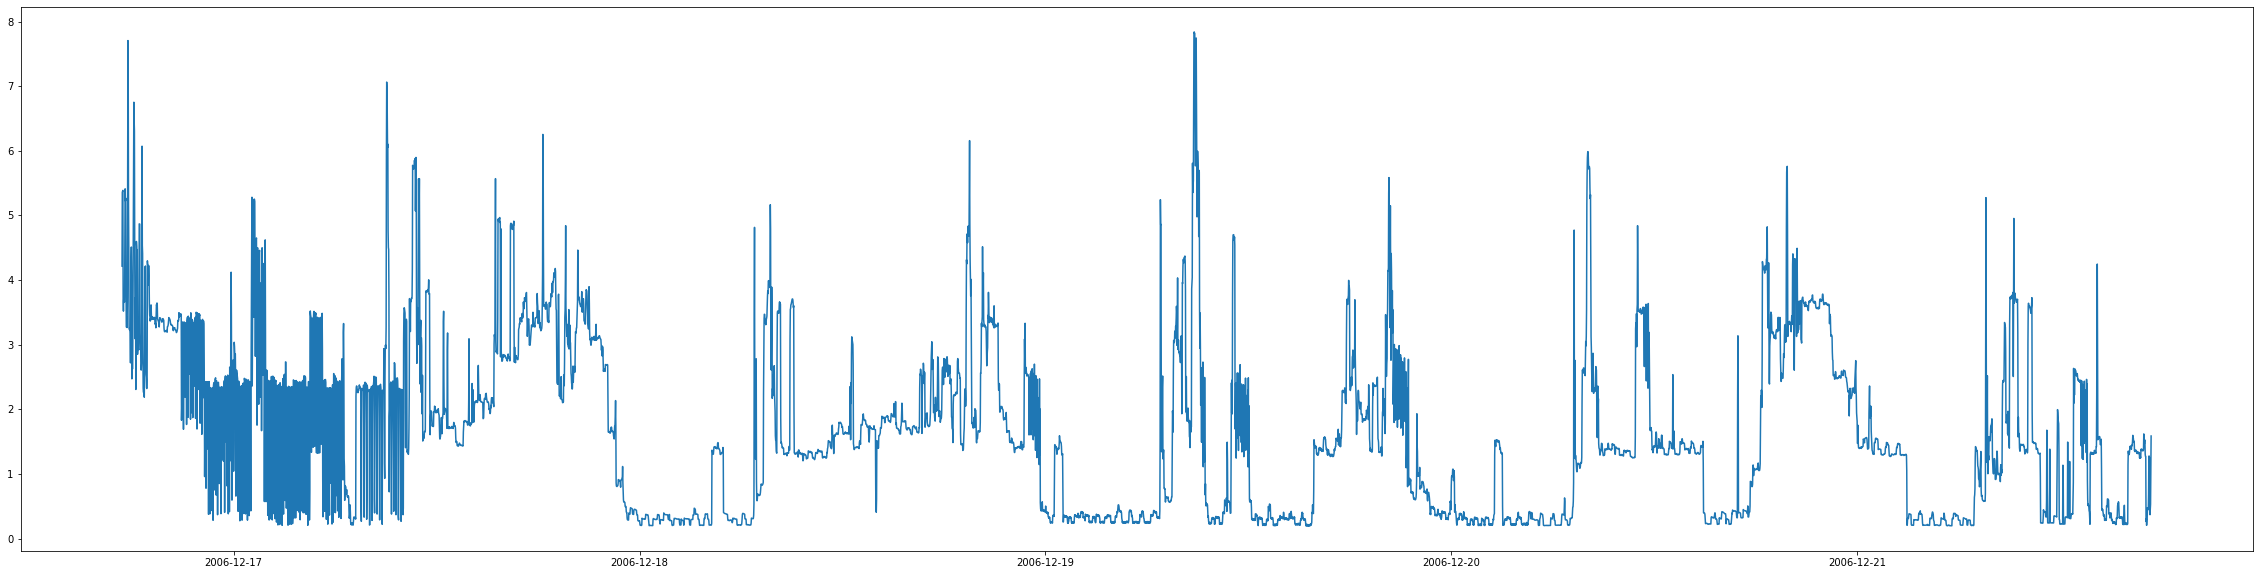

In [21]:
plt.figure(figsize=(40,10))

# plot for 5 days = 7200 minutes
plt.plot(data['DateTime'][:7200],[float(x) for x in data['Global_active_power']][:7200])

In [22]:
data.isnull().any(axis = 1).sum()

0

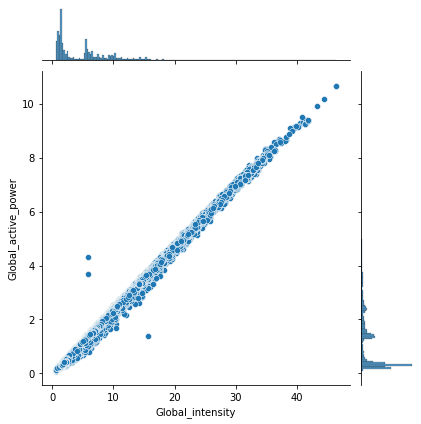

In [23]:
# The correlations between 'Global_intensity', 'Global_active_power'
sns.jointplot(x='Global_intensity', y='Global_active_power', data=df)  
plt.show()

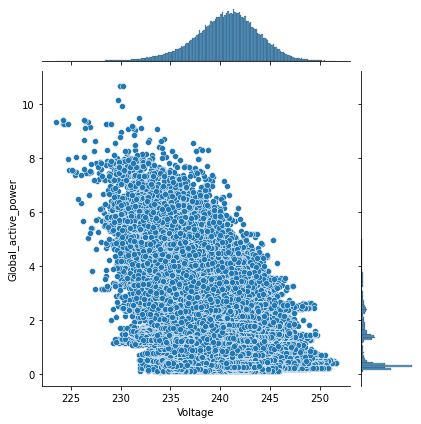

In [24]:
# The correlations between 'Voltage' and  'Global_active_power'

sns.jointplot(x='Voltage', y='Global_active_power', data=df)  
plt.show()

#### From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose.

(8.0, 0.0)

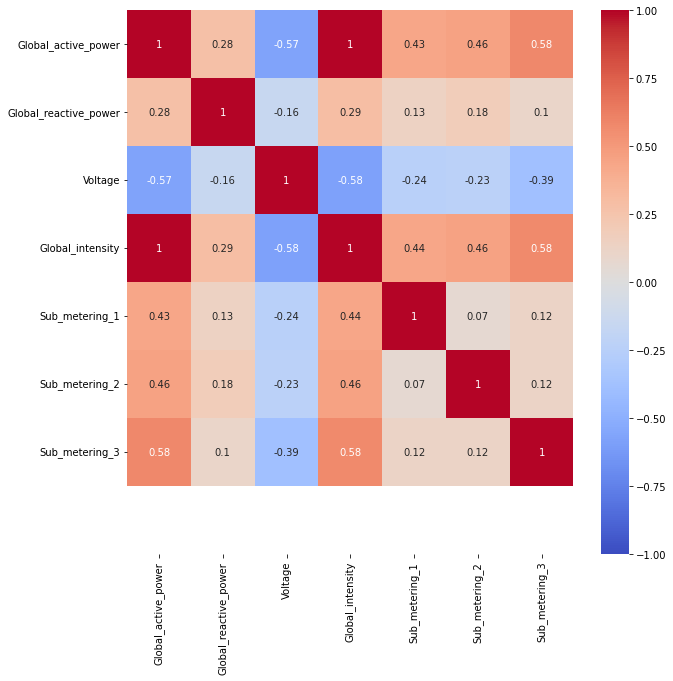

In [25]:
# Calculate correlations among Columns

plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);
ax.set_ylim(8, 0)

In [26]:
def month(x):
    return x.month
data['Month']= data['DateTime'].apply(lambda x: month(x))

def Day(x):
    return x.Day
data['Day']=data['DateTime'].apply(lambda x: x.day)

def hour(x):
    return x.hour
data['Hour']= data['DateTime'].apply(lambda x: hour(x))

C:\Users\saifa\AppData\Local\Temp\ipykernel_12940\3343078529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']= data['DateTime'].apply(lambda x: month(x))
C:\Users\saifa\AppData\Local\Temp\ipykernel_12940\3343078529.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day']=data['DateTime'].apply(lambda x: x.day)
C:\Users\saifa\AppData\Local\Temp\ipykernel_12940\3343078529.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [27]:
data.drop('DateTime',axis=1,inplace=True)
data.tail()

C:\Users\saifa\AppData\Local\Temp\ipykernel_12940\1078037314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('DateTime',axis=1,inplace=True)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Day,Hour
185706,0.320,0.082,235.19,1.6,0.0,2.0,0.0,4,24,16
185707,0.328,0.078,234.53,1.6,0.0,1.0,0.0,4,24,16
185708,0.344,0.088,234.90,1.8,0.0,1.0,0.0,4,24,16
185709,0.416,0.174,235.29,2.0,0.0,1.0,0.0,4,24,16
185710,0.408,0.174,234.82,2.0,0.0,1.0,0.0,4,24,16


<AxesSubplot:xlabel='Month', ylabel='Global_active_power'>

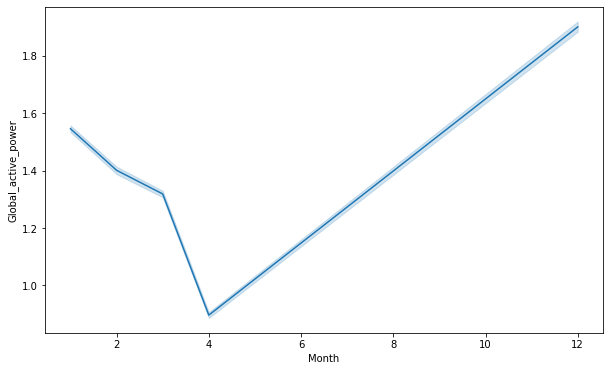

In [28]:
# Monthly change of Global_active_power
plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="Global_active_power",data=data)

<AxesSubplot:xlabel='Day', ylabel='Global_active_power'>

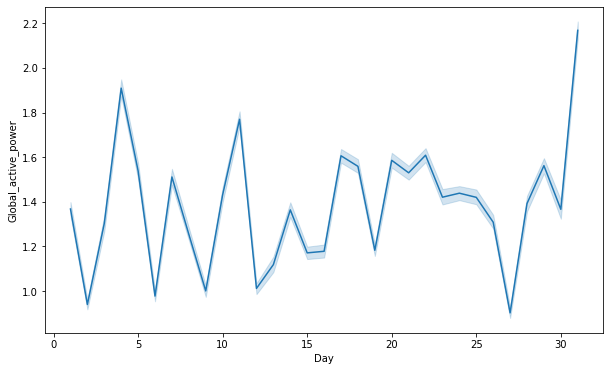

In [29]:
# Dayly change of Global_active_power
plt.figure(figsize=(10,6))
sns.lineplot(x="Day", y="Global_active_power",data=data)

<AxesSubplot:xlabel='Month', ylabel='Global_active_power'>

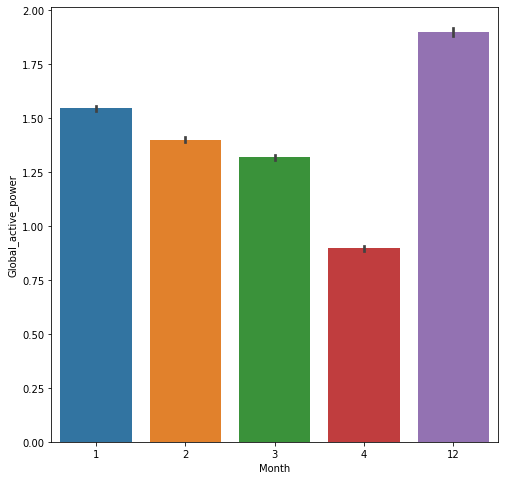

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(x="Month", y="Global_active_power",data=data)

<AxesSubplot:xlabel='Day', ylabel='Global_active_power'>

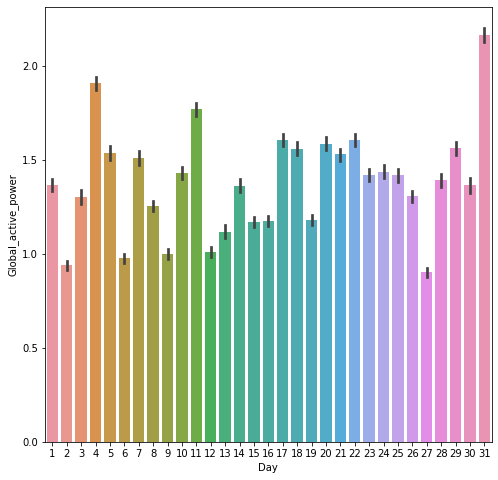

In [31]:
plt.figure(figsize=(8,8))
sns.barplot(x="Day", y="Global_active_power",data=data)

## Data Pre-processing

#### Active Power Uses Prediction

1-Forecast hourly consumption for the next day.<br>
2-Forecast daily consumption for the next week.<br>
3-Forecast daily consumption for the next month.<br>
4-Forecast monthly consumption for the next year.<br>

In [32]:
dt.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [33]:
X = df[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y = df['Global_active_power']

In [34]:
X.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,234.84,18.4,0.0,1.0,17.0
1,0.436,233.63,23.0,0.0,1.0,16.0
2,0.498,233.29,23.0,0.0,2.0,17.0
3,0.502,233.74,23.0,0.0,1.0,17.0
4,0.528,235.68,15.8,0.0,1.0,17.0


In [35]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 2.63170322, -1.83119543,  2.29981017, -0.18966632, -0.10940885,
         1.23352804],
       [ 2.79155707, -2.21309103,  3.14293801, -0.18966632, -0.10940885,
         1.11544729],
       [ 3.34216476, -2.32040053,  3.14293801, -0.18966632,  0.03020114,
         1.23352804],
       ...,
       [-0.29895064, -1.81225846, -0.74278159, -0.18966632, -0.10940885,
        -0.7738447 ],
       [ 0.46479552, -1.68916814, -0.70612386, -0.18966632, -0.10940885,
        -0.7738447 ],
       [ 0.46479552, -1.83750775, -0.70612386, -0.18966632, -0.10940885,
        -0.7738447 ]])

In [36]:
dt.shape

(185711, 10)

In [37]:
dt.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'DateTime'],
      dtype='object')

In [38]:
#rearranging columns
cols = list(dt.columns)
cols = cols[-1:] + cols[:-1]
dt2 = dt[cols]
dt2

,DateTime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...
185706,2007-04-24 16:30:00,24/4/2007,16:30:00,0.320,0.082,235.19,1.6,0.0,2.0,0.0
185707,2007-04-24 16:31:00,24/4/2007,16:31:00,0.328,0.078,234.53,1.6,0.0,1.0,0.0
185708,2007-04-24 16:32:00,24/4/2007,16:32:00,0.344,0.088,234.90,1.8,0.0,1.0,0.0
185709,2007-04-24 16:33:00,24/4/2007,16:33:00,0.416,0.174,235.29,2.0,0.0,1.0,0.0


In [39]:
# add a column for for the remainder of sub metering
eq1 = (dt2['Global_active_power'] * 1000/60) 
eq2 = dt2['Sub_metering_1'] + dt2['Sub_metering_2'] + dt2['Sub_metering_3']
dt2['Sub_metering_4'] = eq1 - eq2
dt2.head(3)

C:\Users\saifa\AppData\Local\Temp\ipykernel_12940\3323042364.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Sub_metering_4'] = eq1 - eq2


,DateTime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


In [40]:
# drop old Date and Time columns
dt2.drop(columns = ['Date','Time'],inplace = True)
dt2.head(3)

C:\Users\saifa\AppData\Local\Temp\ipykernel_12940\3920541985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2.drop(columns = ['Date','Time'],inplace = True)


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
